In [1]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import wavio
from scipy import signal, fft, interpolate
import IPython
from matplotlib.mlab import psd, csd, window_hanning

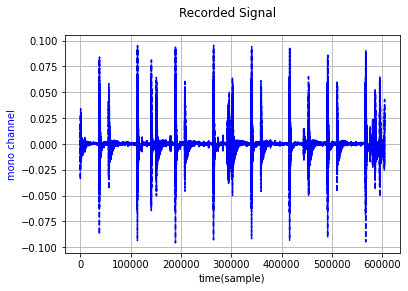

In [2]:
recorded_raw = wavio.read("recorded.wav")

recorded = recorded_raw.data[:, 0]
recorded = recorded.astype(np.float32, order='C') / 32767.0

x_axis = np.arange(len(recorded))

plt.suptitle('Recorded Signal')
plt.plot(x_axis, recorded, 'b--')
plt.ylabel('mono channel', color='b')
plt.grid()

plt.xlabel(r'time(sample)')
plt.show()

IPython.display.display(IPython.display.Audio("recorded.wav", rate=recorded_raw.rate))

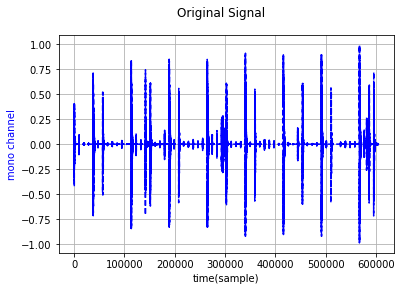

In [3]:
original_raw = wavio.read("original.wav")

original = original_raw.data[:, 0]
original = original.astype(np.float32, order='C') / 32767.0

x_axis = np.arange(len(original))

plt.suptitle('Original Signal')
plt.plot(x_axis, original, 'b--')
plt.ylabel('mono channel', color='b')
plt.grid()

plt.xlabel(r'time(sample)')
plt.show()

IPython.display.display(IPython.display.Audio("original.wav", rate=original_raw.rate))

In [4]:
rms_original = np.sqrt(np.sum(abs(original) * abs(original)) / len(original))
rms_recorded = np.sqrt(np.sum(abs(recorded) * abs(recorded)) / len(recorded))

print("RMS of Original: ", rms_original)
print("RMS of Recorded: ", rms_recorded)
print("Portion: ", rms_recorded/rms_original)

RMS of Original:  0.06886165738916641
RMS of Recorded:  0.006891759963890473
Portion:  0.10008123860484822


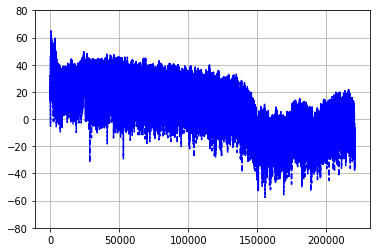

In [5]:
y_original = np.fft.fft(original)
y_original = np.fft.fft(original[:441000])
magnitude = 20 * np.log10(abs(y_original))

plt.plot(magnitude[:len(y_original)//2], 'b--')
plt.ylim(-80, 80)
plt.grid()
plt.show()

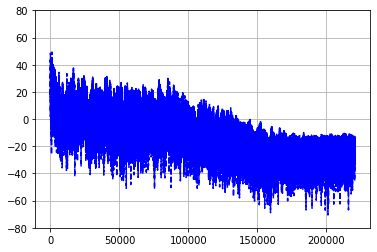

In [6]:
y_recorded = np.fft.fft(recorded)
y_recorded = np.fft.fft(recorded[:441000])
magnitude = 20 * np.log10(abs(y_recorded))

plt.plot(magnitude[:len(y_recorded)//2], 'b--')
plt.ylim(-80, 80)
plt.grid()
plt.show()

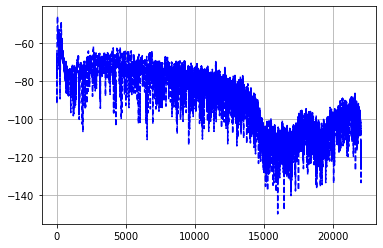

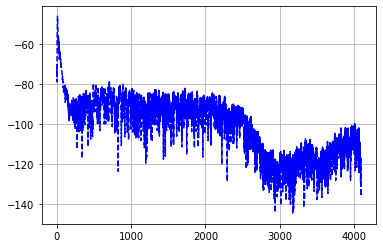

In [7]:
y_original = np.fft.fft(original[:44100]) / len(y_original[:44100])
y_recorded = np.fft.fft(recorded[:44100]) / len(y_recorded[:44100])
diff_y = np.array(y_recorded - y_original)
magnitude = 20 * np.log10(abs(diff_y))

plt.figure(1)
plt.plot(magnitude[:len(diff_y)//2], 'b--')
plt.grid()

target_fs = 8192
current_fs = len(diff_y)
current_y = scipy.signal.decimate(diff_y, int(current_fs/(target_fs*2))+1, n=8, ftype='iir', zero_phase=True)
resample_y = signal.resample(current_y, target_fs)
magnitude = 20 * np.log10(abs(resample_y))

plt.figure(2)
plt.plot(magnitude[:len(resample_y)//2], 'b--')
plt.grid()
plt.show()

In [8]:
np.savetxt('model.out', resample_y, delimiter=',\n', fmt='%1.19f')